# Kmeans 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics

([], <a list of 0 Text major ticklabel objects>)

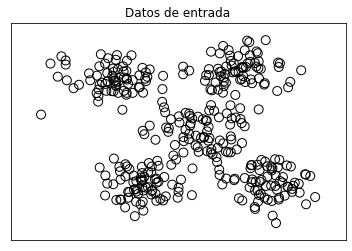

In [2]:
#cargamos los datos
X = np.loadtxt('data_clustering.txt', delimiter=',')

#Definimos el numero de grupos
num_clusters = 5 

#Visualizar los datos de entrada para ver como estan distribuidos 
plt.figure()
plt.scatter(X[:,0], X[:,1], marker='o', facecolors='none', edgecolors='black', s=80)

x_min, x_max = X[:,0].min() - 1 , X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1 , X[:,1].max() + 1

plt.title('Datos de entrada')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())


Segun la grafica hay 5 grupos en los datos, entonces creamos un objeto kmeans para seleccionar los centros iniciales de forma inteligente en lugar de seleccionarlos al azar.

### Parametros
* init: metodo de inicialización para la selección de los centros de los clústeres
* n_clusters: hace referencia a la cantidad de clusteres(grupos)
* n_init: se refiere a las veces que el algoritmo se ejecutara antes de decidir el mejor resultado 

In [3]:
#Creamos KMeans
kmeans = KMeans(init='k-means++', n_clusters=num_clusters, n_init=10)

#Entrenando el metodo de agrupación  KMeans
kmeans.fit(X)

KMeans(n_clusters=5)

Para visualizar los limites, creamos una cuadrícula de puntos y evaluarel modelo en todos los puntos.

<ipython-input-12-6a9a88e503a5>:13: UserWarning: Attempting to set identical bottom == top == -1.29 results in singular transformations; automatically expanding.
  plt.imshow(output, interpolation='none',


([], <a list of 0 Text major ticklabel objects>)

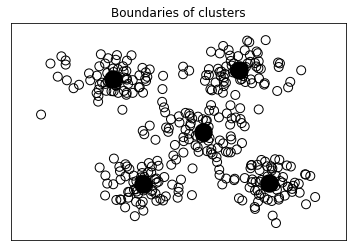

In [12]:
#Tamaño d paso de la malla 
step_size = 0.01

#Definimos la cuadricula de puntos
x_vals, y_vals = np.meshgrid(np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size))

#Predecir las salidas para todos los puntos usando el modelo k-means
output = kmeans.predict(np.c_[x_vals.ravel(), y_vals.ravel()])

output = output.reshape(x_vals.shape)
plt.figure()
plt.clf()
plt.imshow(output, interpolation='nearest', 
           extent=(x_vals.min(),x_vals.max(),y_vals.min(),y_vals.min()), cmap=plt.cm.Paired,aspect='auto',origin='lower')
# Overlay input points
plt.scatter(X[:,0], X[:,1], marker='o', facecolors='none',edgecolors='black', s=80)

# Plot the centers of clusters
cluster_centers = kmeans.cluster_centers_
plt.scatter(cluster_centers[:,0], cluster_centers[:,1],marker='o',s=210,linewidths=4,color='black',zorder=12,facecolors='black')
plt.title('Boundaries of clusters')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())